# Bostonの住宅価格のデータセットのEDA

# わかったこと

## LSTAT(低所得者の割合)に相関の強い変数の調査 

MEDV(物件価格),CRIM(犯罪率),RM(部屋数)は相関関係が強いように見えた。

## MEDV(低所得者の割合)に相関の強い変数の調査

RM(部屋数),LSTAT(低所得者の割合)　8‐ヒートマップ参照

## その他

その他NOXなど相関がありそうなものもあったが、NOXは直接の物件の値段を決める要因ではなく、間接的な要因かもしれない。

たとえば、INDUSの情報で、商業地域以外での場所が工業地域なのか農地なのか分けるパラメーターがあれば面白いかも。

CHASはかなり相関が低かったが

# できなかったこと

CHAS以外に2値や3値のパラメーターがないのでKDEプロットなどでカテゴリ分けできなかった。

閾値を設定してカテゴリ分けしてもよかったかも。

# 必要なパッケージのインポート

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_profiling as pdp
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

# 仕様書

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## 仕様書まとめ

    ボストンの住宅価格
    
    506個のエリアデータ

    13個のアトリビュート

    :Attribute Information (in order):
        - CRIM     犯罪発生率 [%]
        - ZN       25000平方フィートを超える住宅の土地の割合 [%]
        - INDUS    小売業以外の商業が占める土地の割合 [%]
        - CHAS     チャールズ川のダミー変数？ (= 1 川近辺の土地; 0 それ以外)
        - NOX      一酸化窒素濃度 (parts per 10 million)
        - RM       平均の部屋数
        - AGE      1940年以前の物件の割合
        - DIS      ボストンに5件ある雇用施設までの距離
        - RAD      高速道路までのアクセスのしやすさ
        - TAX      不動産税率　10000＄あたり
        - PTRATIO  町ごとの教師の率
        - B        黒人の比率
        - LSTAT    低所得者の割合
        - MEDV     1000ドルでの所有者居住住宅の中央値
        
    カーネギーメロン大学がデータの管理をしている。
    UCL MLより引用したデータセット
    https://archive.ics.uci.edu/ml/machine-learning-databases/housing/
    
    主に回帰問題のために利用される。
    特に(MEDV)住宅価格の予想に使用される。

# データフレーム作成　閲覧

In [3]:
df = pd.DataFrame(boston.data, columns = boston.feature_names).assign(MEDV=np.array(boston.target))

変数が14、標本が506

In [4]:
df.shape

(506, 14)

欠損値はなし

In [5]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 方針

変数の数が多いのでペアプロットなどは難しい。

→一部の変数について見当をつけて分析

LSTAT(低所得者の割合)に注目

## LSTAT(低所得者の割合)と他の変数の相関関係を調査

### LSTAT(低所得者の割合)とMEDV(住宅価格)の関係

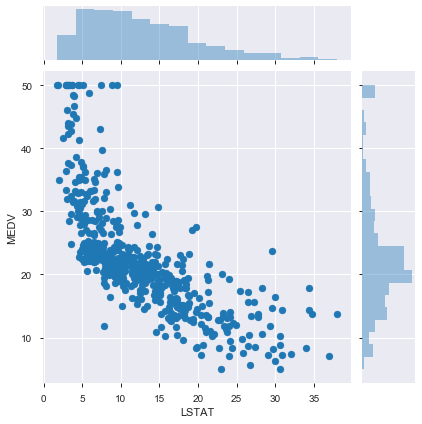

In [7]:
sns.jointplot('LSTAT', 'MEDV', data=df)

低所得者が多い地域では、住宅価格が安い。所得が高い人のエリアの住宅価格は高い。

### CRIM(犯罪率)とLSTAT(低所得者の割合)について

所得が低いと犯罪率が高そう。

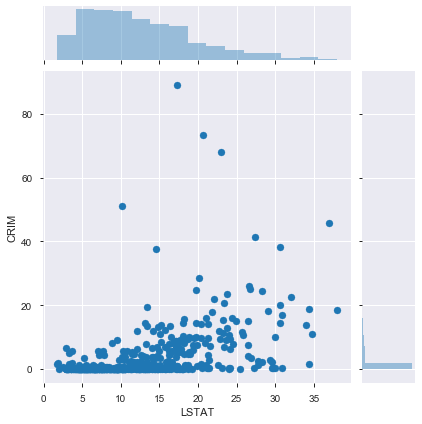

In [8]:
sns.jointplot('LSTAT', 'CRIM', data=df)

所感

低所得者の割合が20%を超える地域では犯罪率が高く、因果関係がある。低所得者が少ない地域ではほとんど犯罪が起きていない。

犯罪率が10%以上の地域を抽出

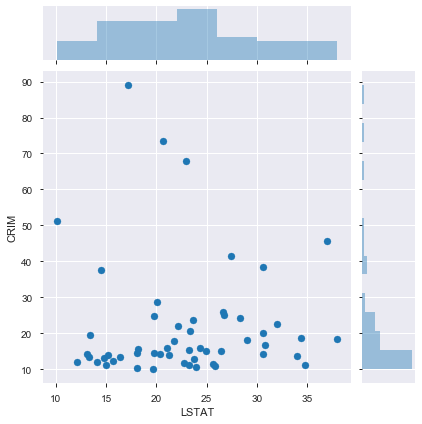

In [9]:
df_crim_high = df[df['CRIM']>10]
sns.jointplot('LSTAT', 'CRIM', data=df_crim_high)

低所得者が10%以上のエリアでしか、犯罪発生率が10%を超えない。

LSTAT(低所得者の割合)とMEDV(住宅価格)の関係

### LSTAT(低所得者の割合と)とRM(住宅の部屋数)の関係

LSTAT(低所得者の割合と)とRM(住宅の部屋数)の調査

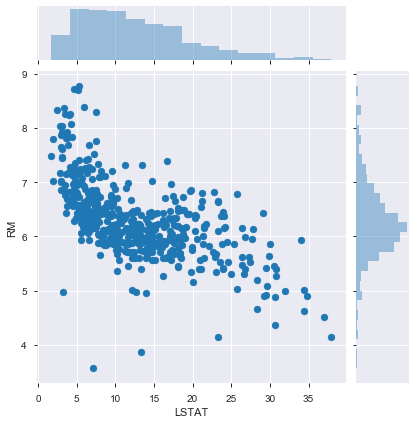

In [10]:
sns.jointplot('LSTAT', 'RM', data=df)

所得が高いほど部屋数が多い物件に住んでいる。

### LSTATとAGEの関係

LSTAT(低所得者の割合と)とAGE(1940年以前の物件の割合)の調査

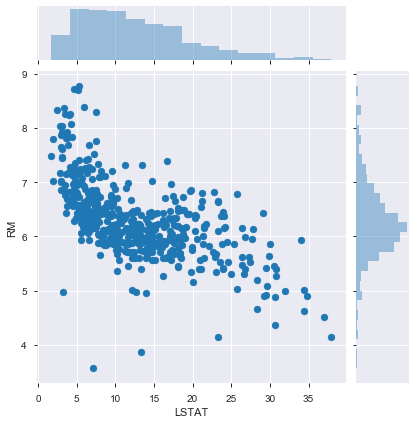

In [11]:
sns.jointplot('LSTAT', 'RM', data=df)

所得が高いほど部屋数が多い物件に住んでいる。

# 相関係数をヒートマップで出力

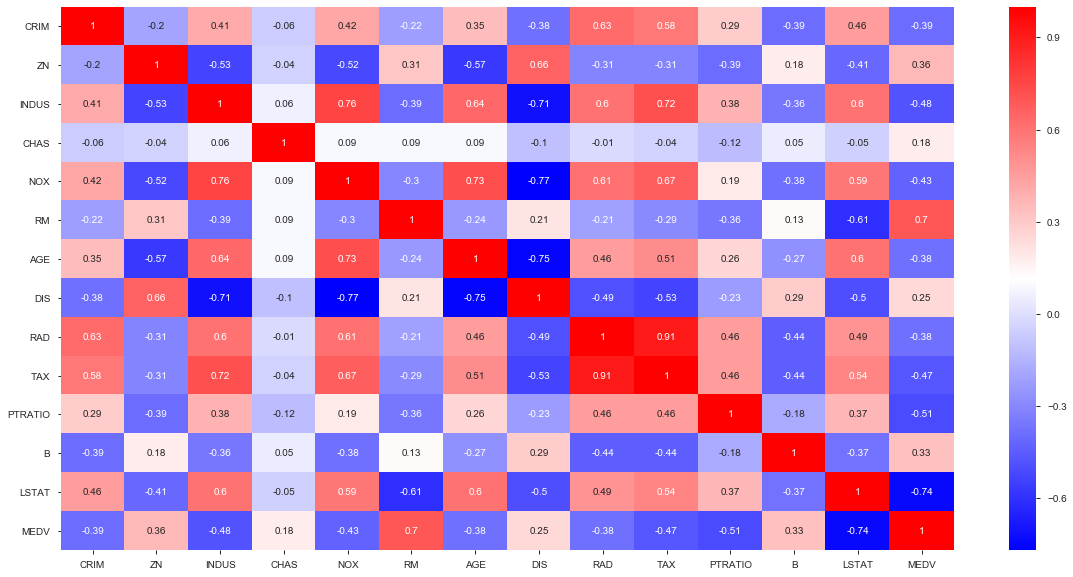

In [12]:
correlation_matrix = df.corr().round(2)
plt.figure(figsize=(20, 10))
sns.heatmap(data=correlation_matrix, annot=True,cmap='bwr')

# その他　杉山君との協力で分析した内容

INDUSとNOXの関係

NOX(一酸化窒素が多い地域は工業地域？)

商業地区以外には一次産業も二次産業も含む？

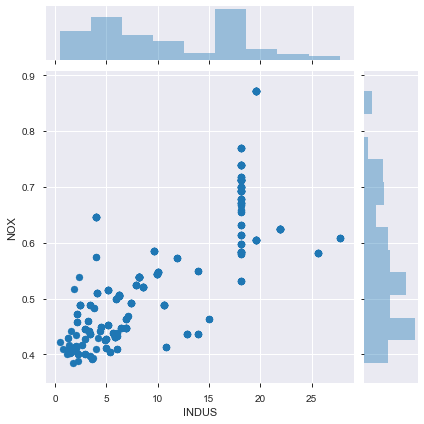

In [13]:
sns.jointplot('INDUS', 'NOX', data=df)

戦前の古い物件が多い地域は工業地域？農地？かも。

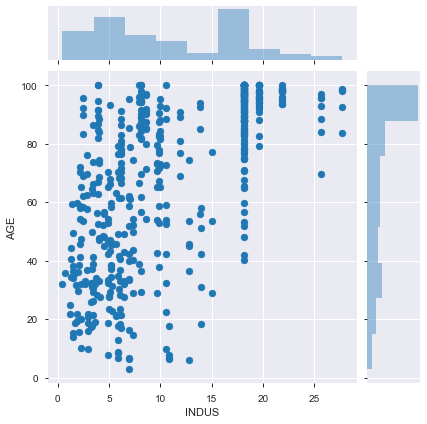

In [14]:
sns.jointplot('INDUS','AGE', data=df)

# 終わり